# 分析評論

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [22]:
df_review_overview = pd.read_csv('googlemaps爬蟲與清整/result/review_overview.csv')



C:\Users\User\AppData\Local\Temp\ipykernel_5092\2286133918.py:1: DtypeWarning: Columns (5,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_overview = pd.read_csv('D:/googlemaps_爬蟲/googlemaps爬蟲與清整/result/review_overview.csv')


In [23]:
df_review_overview.head(2)

,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,...,rw_reviewer,rw_reviewer_page,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town
0,125K---石墨烯遠紅外線汗蒸,2023-08-03 13:11:08,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...,900.0,1700.0,900.0,1700.0,...,婉,https://www.google.com/maps/contrib/1069408598...,在地嚮導 · 44 則評論,3 週前,5 顆星,NaN,很豐富的產品項，服務很親切,NaN,苗栗縣,頭屋鄉
1,125K---石墨烯遠紅外線汗蒸,2023-08-03 13:11:08,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...,900.0,1700.0,900.0,1700.0,...,黎文心,https://www.google.com/maps/contrib/1129165119...,在地嚮導 · 187 則評論,7 個月前,5 顆星,NaN,NaN,NaN,苗栗縣,頭屋鄉


In [24]:
print('total review count: ',len(df_review_overview))
df_review_overview.isnull().sum().drop(['rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])



total review count:  1733311


rw_name                        0
rw_current_time                0
rw_category                  270
rw_tag                     27954
rw_tickets_sale          1620798
rw_open_time              124731
rw_latitude                10257
rw_longitude               11820
rw_introduction          1162918
rw_rating_total               12
rw_rating_count_total         12
rw_phone                  633974
rw_address                     0
rw_reviewer                    1
rw_reviewer_page               0
rw_reviewer_tag            64098
rw_review_time             12497
rw_rating_reviewer         12497
rw_likes                 1528316
rw_review                 852885
rw_review_word           1674065
rw_city                     1148
rw_town                     4920
dtype: int64

新增欄位:評論字數

In [25]:
# df_review_overview['review_len'] = df_review_overview['rw_review'].apply(len)
df_review_overview['review_len'] = df_review_overview['rw_review'].apply(lambda x: len(x) if isinstance(x, str) else 0)

df_review_overview.head(2)

,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,...,rw_reviewer_page,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len
0,125K---石墨烯遠紅外線汗蒸,2023-08-03 13:11:08,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...,900.0,1700.0,900.0,1700.0,...,https://www.google.com/maps/contrib/1069408598...,在地嚮導 · 44 則評論,3 週前,5 顆星,NaN,很豐富的產品項，服務很親切,NaN,苗栗縣,頭屋鄉,14
1,125K---石墨烯遠紅外線汗蒸,2023-08-03 13:11:08,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...,900.0,1700.0,900.0,1700.0,...,https://www.google.com/maps/contrib/1129165119...,在地嚮導 · 187 則評論,7 個月前,5 顆星,NaN,NaN,NaN,苗栗縣,頭屋鄉,0


將評論字數數量分類

In [26]:
# 定義分類區間
bins = [0,1,5, 10, 50,100,150,200,250,300,500,1000,2000,100000]
labels = []
for tmp in range(1,len(bins)):
    labels.append(str(bins[tmp-1])+'<= x <'+str(bins[tmp]))

# 使用 pd.cut() 函數進行分類
# df = df_review_overview
df_review_overview['review_len_category'] = pd.cut(df_review_overview['review_len'], bins=bins, labels=labels, right=False)

# 計算每個分類的數量
count_by_category = df_review_overview['review_len_category'].value_counts()
count_by_category.sort_index()
# count_by_category
# formatted_counts = []
# count_by_category_look=count_by_category
# for i,count in enumerate(count_by_category):
#     formatted_count = '{:,}'.format(count)
#     formatted_counts.append(formatted_count)
#     count_by_category_look[i]=formatted_count
# count_by_category_look.sort_index()

review_len_category
0<= x <1            852885
1<= x <5             53046
5<= x <10           174162
10<= x <50          491550
50<= x <100         101250
100<= x <150         27855
150<= x <200         11305
200<= x <250          7751
250<= x <300          4830
300<= x <500          6487
500<= x <1000         1926
1000<= x <2000         226
2000<= x <100000        38
Name: count, dtype: int64

In [27]:
# 計算比例
total_sum = count_by_category.sum()
count_by_category_percentage = count_by_category / total_sum
print("Max len :", df_review_overview['review_len'].max())
print('總資料筆數: ','{:,}'.format(len(df_review_overview)))
print(count_by_category_percentage.apply(lambda x: '{:.2%}'.format(x)).sort_index())

Max len : 4097
總資料筆數:  1,733,311
review_len_category
0<= x <1            49.21%
1<= x <5             3.06%
5<= x <10           10.05%
10<= x <50          28.36%
50<= x <100          5.84%
100<= x <150         1.61%
150<= x <200         0.65%
200<= x <250         0.45%
250<= x <300         0.28%
300<= x <500         0.37%
500<= x <1000        0.11%
1000<= x <2000       0.01%
2000<= x <100000     0.00%
Name: count, dtype: object


In [28]:
print('describe: ')
print(df_review_overview['review_len'].describe().apply(lambda x: format(x, ',.2f')))
print('-'*40)
print('十分位數:')
print(round( df_review_overview['review_len'].quantile([0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]),2))

describe: 
count    1,733,311.00
mean            18.44
std             48.96
min              0.00
25%              0.00
50%              3.00
75%             19.00
max          4,097.00
Name: review_len, dtype: object
----------------------------------------
十分位數:
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     3.0
0.6     8.0
0.7    14.0
0.8    24.0
0.9    47.0
Name: review_len, dtype: float64


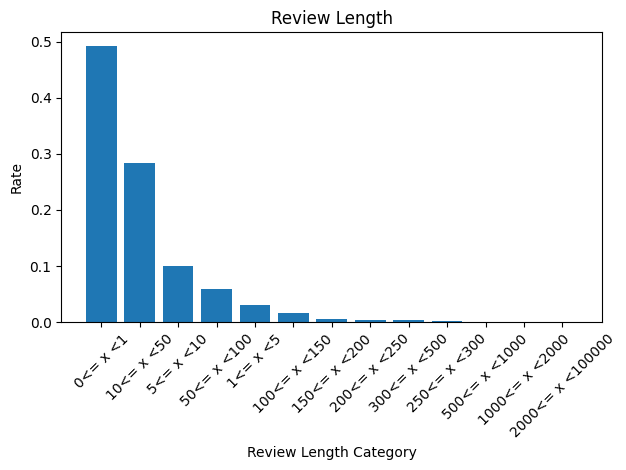

In [29]:
# 繪製長條圖
plt.bar(count_by_category_percentage.index, count_by_category_percentage.values)
plt.xlabel('Review Length Category')
plt.ylabel('Rate')
plt.title('Review Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

找到一些欄位不知道為什麼評論星星數為空值(不應該為空)，先列出奇怪數據檔案
預計刪除重撈。


array(['南投休閒農場', '海盜村', '清境農場青青草原', '紫心樓', '花自在食宿館', '花露農場 Flower Home',
       '西港歇腳居', '逸香園農場', '青竹文化園區&隱竹別院', '飛牛牧場', '香格里拉休閒農場'], dtype=object)

try1. 預計刪除重撈。=>
重新下載後還是沒用

In [30]:
df_review_overview['rw_rating_reviewer'].isna().sum()

12497

In [31]:
ull_name_values = df_review_overview.loc[df_review_overview['rw_rating_reviewer'].isna(), 'rw_name'].unique()
ull_name_values
# null_values.head(3)

array(['北海岸愛之船 民宿&餐廳',
       '南庄橄欖樹【民宿+咖啡廳】《走進王子公主童話的美拍地》《沒養貓也可以來拍貓》《「橄」於跟她求婚的創意就在橄欖樹民宿》',
       '南投休閒農場', '大坑休閒農場', '山上別院 Yamakami Living', '拉波波村', '新豐休閒農場',
       '海盜村', '清境農場青青草原', '清水那方 遊憩園地', '珍 粉紅教堂咖啡', '禮納里-脫鞋子部落', '竹亮山莊民宿',
       '紫心樓', '綠意山莊', '羅東觀光夜市', '花自在食宿館', '花露農場 Flower Home', '芹壁休閒渡假村',
       '芹壁山城民宿 Chinbe Hill Village House B&B', '芹壁幸福海岸', '芹壁望海樓民宿&美食廣場',
       '芹壁榕樹下民宿(我們沒有使用網頁訂房，請透過FB聯絡，底下訂房網連結非本民宿，Google自動亂連結請勿透過那邊訂房，1200的房價不是我們的房間，房間價格請看官網)',
       '藍映海岸景觀民宿', '蘇維拉莊園', '蘭嶼 月光海小棧', '蘭嶼·貝殼屋民宿', '蘭嶼海堤驛棧', '蘭嶼海的窩',
       '蘭嶼薰多琦海景休閒民宿－網友推薦精緻高CP值民宿 網美網紅好評必住休閒渡假住宿價格 平價漂亮海灘海邊海景景觀民宿 熱門打工換宿評價 人氣海釣釣魚首選',
       '蘭嶼鄉間小路', '虎山溫泉會館(湯之島)-泰安溫泉', '西港歇腳居', '覓境E19蒙古包露營區', '逸香園農場',
       '青竹文化園區&隱竹別院', '飛牛牧場', '香格里拉休閒農場', "黑鰭飲冰宿·蘭嶼 B'Fin"], dtype=object)

try2. 檢查爬蟲。=>真的是空值 ，處理方式 刪除這些欄位

In [32]:
df_review_overview.dropna(subset=['rw_rating_reviewer'], inplace=True)
df_review_overview['rw_rating_reviewer'].isna().sum()

0

計算星級數分佈

In [33]:
# 刪除表格內"顆星"的詞彙
df_review_overview['rw_rating_reviewer']=df_review_overview['rw_rating_reviewer'].str.replace('顆星', '').astype(int)
df_review_overview.head(2)

,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,...,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len,review_len_category
0,125K---石墨烯遠紅外線汗蒸,2023-08-03 13:11:08,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...,900.0,1700.0,900.0,1700.0,...,在地嚮導 · 44 則評論,3 週前,5,NaN,很豐富的產品項，服務很親切,NaN,苗栗縣,頭屋鄉,14,10<= x <50
1,125K---石墨烯遠紅外線汗蒸,2023-08-03 13:11:08,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...,900.0,1700.0,900.0,1700.0,...,在地嚮導 · 187 則評論,7 個月前,5,NaN,NaN,NaN,苗栗縣,頭屋鄉,0,0<= x <1


In [34]:
starts_value_counts = df_review_overview['rw_rating_reviewer'].value_counts()
starts_value_counts.sort_index()

rw_rating_reviewer
1     39473
2     35324
3    202432
4    487892
5    955693
Name: count, dtype: int64

In [35]:
# 計算比例
total_sum = starts_value_counts.sum()
starts_value_percentage = starts_value_counts / total_sum
print('總資料筆數: ','{:,}'.format(len(df_review_overview)))
print(starts_value_percentage.apply(lambda x: '{:.2%}'.format(x)).sort_index())

總資料筆數:  1,720,814
rw_rating_reviewer
1     2.29%
2     2.05%
3    11.76%
4    28.35%
5    55.54%
Name: count, dtype: object


In [36]:
# 總平均星星數
round(df_review_overview['rw_rating_reviewer'].mean(),2)

4.33

列出評論者姓名為空的狀況

In [38]:
rw_reviewer_null = df_review_overview['rw_reviewer'].isnull()
df_review_overview[rw_reviewer_null]


,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,...,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len,review_len_category
1305416,花蓮縣原住民族野菜學校,2023-08-05 02:28:58,旅遊景點,無障礙洗手間 無障礙停車場 洗手間 餐廳 適合兒童,NaN,星期六09:00–12:0013:00–17:00 星期日09:00–12:0013:00–...,900.0,1200.0,900.0,1200.0,...,5 則評論,4 年前,5,NaN,NaN,NaN,花蓮縣,花蓮市,0,0<= x <1


只有一項故刪除

In [42]:
df_review_overview = df_review_overview.dropna(subset=['rw_reviewer'])
df_review_overview[rw_reviewer_null]

C:\Users\User\AppData\Local\Temp\ipykernel_5092\4190197979.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_review_overview[rw_reviewer_null]


,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,...,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len,review_len_category


各地區的評論文字雲 試畫板 後須搬移走

#新北市

Building prefix dict from d:\googlemaps_爬蟲\專題資料分析\chinexe_font\dict.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.uad486b555f26a5a41d208a693ba5f9ba.cache
Loading model cost 0.685 seconds.
Prefix dict has been built successfully.


新北市文字雲


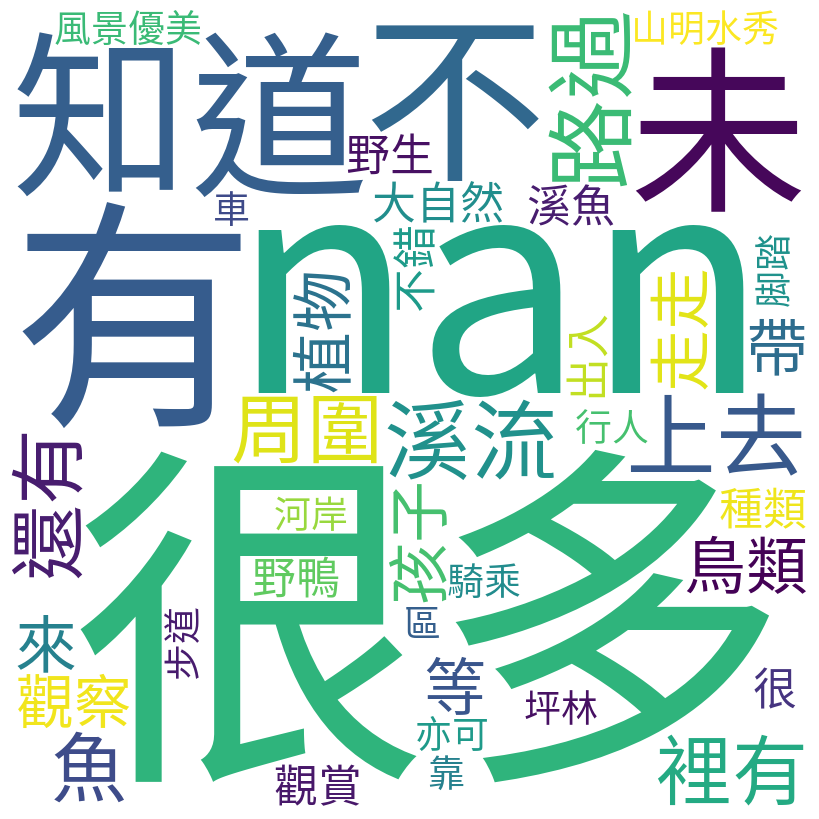

In [49]:
%matplotlib inline
from wordcloud import WordCloud#, STOPWORDS 
import matplotlib.pyplot as plt 
import jieba

city_worldcloud='新北市'
jieba.set_dictionary('chinexe_font/dict.txt')
# wordlist = list(jieba.cut(str(df_review_overview[df_review_overview['rw_city']=='新北市'].name)))
wordlist = list(jieba.cut(str(df_review_overview[df_review_overview['rw_city'] == city_worldcloud]['rw_review'].values)))
words = " ".join(wordlist)

font = 'chinexe_font/SourceHanSansTW-Regular.otf'
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                # stopwords = stopwords, 
                min_font_size = 10,font_path=font).generate(words) 
  
# plot the WordCloud image      
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']              
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

print('新北市文字雲')
plt.show() 
wordcloud.to_file('img/'+city_worldcloud+'_word_cloud.png')

列出評論數、評論星數為0的狀況

In [44]:
rw_rating_total_null = df_review_overview['rw_rating_total'].isnull()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df_review_overview[rw_rating_total_null].head(2)

,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_latitude,rw_longitude,rw_introduction,rw_rating_total,rw_rating_count_total,rw_phone,rw_address,rw_reviewer,rw_reviewer_page,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len,review_len_category
451633,大村幾何葡萄觀光步道,2023-08-18 00:22:03,旅遊景點,適合兒童,NaN,星期五24 小時營業 星期六24 小時營業 星期日24 小時營業 星期一24 小時營業 星期二24 小時營業 星期三24 小時營業 星期四24 小時營業,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,23.989421,120.549248,NaN,NaN,NaN,0910 591 603,515彰化縣大村鄉中正西路315-11號,吳宗哲,https://www.google.com/maps/contrib/107162103416513670708/reviews?hl=zh-TW,在地嚮導 · 443 則評論,1 週前,4,NaN,NaN,感謝評論,彰化縣,大村,0,0<= x <1
852822,梅山公園涼亭,2023-08-03 19:40:51,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,簡郁玲,https://www.google.com/maps/contrib/106146564190264910748/reviews?hl=zh-TW,17 則評論,1 天前,1,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852823,梅山公園涼亭,2023-08-03 19:40:51,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,Joanna,https://www.google.com/maps/contrib/100269992107091813063/reviews?hl=zh-TW,在地嚮導 · 15 則評論,2 天前,5,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852824,梅山公園涼亭,2023-08-03 19:40:51,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,麥給敖,https://www.google.com/maps/contrib/105089553322482413562/reviews?hl=zh-TW,在地嚮導 · 23 則評論,2 天前,5,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852825,梅山公園涼亭,2023-08-03 19:40:51,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,邱琮昇,https://www.google.com/maps/contrib/107099881203440643818/reviews?hl=zh-TW,2 則評論,2 天前,5,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852826,梅山公園涼亭,2023-08-03 19:40:51,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,黃錦台,https://www.google.com/maps/contrib/117472461403607966334/reviews?hl=zh-TW,在地嚮導 · 25 則評論,4 天前,4,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852827,梅山公園涼亭,2023-08-03 19:40:51,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,謝程亦,https://www.google.com/maps/contrib/114602702397366279938/reviews?hl=zh-TW,在地嚮導 · 5 則評論,4 天前,5,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852828,梅山公園涼亭,2023-08-03 19:40:52,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,柳宏益,https://www.google.com/maps/contrib/110742887521121656381/reviews?hl=zh-TW,NaN,5 天前,5,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852829,梅山公園涼亭,2023-08-03 19:40:52,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.556057,NaN,NaN,NaN,NaN,603嘉義縣梅山鄉,鄭維展,https://www.google.com/maps/contrib/109682203698905516310/reviews?hl=zh-TW,NaN,6 天前,4,NaN,NaN,NaN,嘉義縣,梅山鄉,0,0<= x <1
852830,梅山公園涼亭,2023-08-03 19:40:52,旅遊景點,室外雅座 外帶 內用 外送 無障礙座位 小菜 咖啡 酒精飲料 啤酒 午餐 晚餐 餐飲服務 座位 洗手間 氣氛悠閒 環境舒適 適合團體 接受訂位 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.578160,120.55605

刪除這幾筆資料，經觀察這些資料像是 梅山公園涼亭 在點擊過程中吃到梅山公園資料 故刪除，其他檔案因為撈取時間不同有人在過程中評論造成沒對上 但資料筆數都為1筆 故也刪除

In [45]:
df_review_overview = df_review_overview.dropna(subset=['rw_rating_total'])
df_review_overview[rw_rating_total_null]


C:\Users\User\AppData\Local\Temp\ipykernel_5092\2758073964.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_review_overview[rw_rating_total_null]


,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_latitude,rw_longitude,rw_introduction,rw_rating_total,rw_rating_count_total,rw_phone,rw_address,rw_reviewer,rw_reviewer_page,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len,review_len_category


In [46]:
print('total review count: ',len(df_review_overview))
df_review_overview.isnull().sum().drop(['rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])



total review count:  1720801


rw_name                        0
rw_current_time                0
rw_category                  270
rw_tag                     16737
rw_tickets_sale          1609188
rw_open_time              114403
rw_latitude                    0
rw_longitude                1563
rw_introduction          1150828
rw_rating_total                0
rw_rating_count_total          0
rw_phone                  631893
rw_address                     0
rw_reviewer                    0
rw_reviewer_page               0
rw_reviewer_tag            63605
rw_review_time                 0
rw_rating_reviewer             0
rw_likes                 1519053
rw_review                 848479
rw_review_word           1663719
rw_city                     1148
rw_town                     4920
review_len                     0
review_len_category            0
dtype: int64

與search一樣的問題 但用不到故不處理

In [47]:
rw_longitude_null = df_review_overview['rw_longitude'].isnull()

df_review_overview[rw_longitude_null].head(2)

,rw_name,rw_current_time,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_latitude,rw_longitude,rw_introduction,rw_rating_total,rw_rating_count_total,rw_phone,rw_address,rw_reviewer,rw_reviewer_page,rw_reviewer_tag,rw_review_time,rw_rating_reviewer,rw_likes,rw_review,rw_review_word,rw_city,rw_town,review_len,review_len_category
267804,南門町三二三 - 台北植物園,2023-08-09 17:22:09,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.032524,NaN,NaN,4.2,4240.0,02 2303 9978,100台北市中正區和平西路二段和南海路口,Ying-Hsuan Lin,https://www.google.com/maps/contrib/103564767860381145479/reviews?hl=zh-TW,在地嚮導 · 32 則評論,1 小時前,5,NaN,鬧區中的綠洲，幽美、安靜，來這裡走走可以洗滌心靈。,NaN,台北市,中正區,26,10<= x <50
267805,南門町三二三 - 台北植物園,2023-08-09 17:22:09,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.032524,NaN,NaN,4.2,4240.0,02 2303 9978,100台北市中正區和平西路二段和南海路口,詹麗珠,https://www.google.com/maps/contrib/112106010191870451382/reviews?hl=zh-TW,在地嚮導 · 50 則評論,8 小時前,4,NaN,NaN,NaN,台北市,中正區,0,0<= x <1


整體的describe

In [37]:
print(df_review_overview.describe())

       rw_Monday_open  rw_Monday_close  rw_Tuesday_open  rw_Tuesday_close  \
count    1.401655e+06     1.401655e+06     1.501204e+06      1.501204e+06   
mean     3.191096e+02     2.157390e+03     3.596007e+02      2.124713e+03   
std      4.355720e+02     3.879372e+02     4.474866e+02      3.973514e+02   
min      0.000000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
25%      0.000000e+00     1.800000e+03     0.000000e+00      1.800000e+03   
50%      0.000000e+00     2.400000e+03     0.000000e+00      2.400000e+03   
75%      8.000000e+02     2.400000e+03     8.300000e+02      2.400000e+03   
max      1.830000e+03     2.400000e+03     1.800000e+03      2.400000e+03   

       rw_Wednesday_open  rw_Wednesday_close  rw_Thursday_open  \
count       1.540870e+06        1.540870e+06      1.558799e+06   
mean        3.759209e+02        2.112668e+03      3.822175e+02   
std         4.535123e+02        4.014032e+02      4.549340e+02   
min         0.000000e+00        0.000000e+